# Rede Neural de Dados sobre Diabetes

In [1]:
from sklearn.datasets import load_diabetes
import tensorflow as tf
#Load dos dados do dataset diabetes e ver a descrição do dataset
diabetes_dataset = load_diabetes()
print(diabetes_dataset['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

In [2]:
#verificar as chaves existentes no dataset
print(diabetes_dataset.keys())

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])


In [3]:
#Salvar as entras e os rotulos em variaveis
data = diabetes_dataset["data"]
targets = diabetes_dataset["target"]

In [4]:
#Normalizar os dados
targets = (targets - targets.mean(axis=0)) / targets.std()

In [5]:
#Dividis os dados em treino e testes
from sklearn.model_selection import train_test_split

train_data, test_data, train_targets, test_targets = train_test_split(data, targets, test_size=0.1)

print(train_data.shape)
print(test_data.shape)
print(train_targets.shape)
print(test_targets.shape)

(397, 10)
(45, 10)
(397,)
(45,)


### FeedFoward Rede Neural

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


#Criando a rede Neural

def get_model():
  model = Sequential([
          Dense(128, activation="relu", input_shape=(train_data.shape[1],)),
          Dense(128, activation="relu"),
          Dense(128, activation="relu"),
          Dense(128, activation="relu"),
          Dense(128, activation="relu"),
          Dense(128, activation="relu"),
          Dense(1, activation="sigmoid")
  ])

  return model

In [7]:
#Criando uma variavel para a rede neural
model = get_model()

In [8]:
#Ver o sumario da rede neural

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1408      
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 128)               16512     
                                                                 
 dense_6 (Dense)             (None, 1)                 1

In [9]:
#Copilar o modelo

opt = tf.keras.optimizers.Adam(learning_rate=0.005)
mse = tf.keras.metrics.mean_squared_error

model.compile(
      optimizer=opt,
      loss="mse",
      metrics=mse
)

In [10]:
history = model.fit(train_data, train_targets, epochs=100, validation_split=0.15,batch_size=64, verbose=2)

Epoch 1/100
6/6 - 1s - loss: 1.1557 - mean_squared_error: 1.1557 - val_loss: 0.9194 - val_mean_squared_error: 0.9194 - 1s/epoch - 234ms/step
Epoch 2/100
6/6 - 0s - loss: 0.9323 - mean_squared_error: 0.9323 - val_loss: 0.8719 - val_mean_squared_error: 0.8719 - 39ms/epoch - 7ms/step
Epoch 3/100
6/6 - 0s - loss: 0.8184 - mean_squared_error: 0.8184 - val_loss: 0.7840 - val_mean_squared_error: 0.7840 - 39ms/epoch - 6ms/step
Epoch 4/100
6/6 - 0s - loss: 0.7789 - mean_squared_error: 0.7789 - val_loss: 0.7495 - val_mean_squared_error: 0.7495 - 41ms/epoch - 7ms/step
Epoch 5/100
6/6 - 0s - loss: 0.7423 - mean_squared_error: 0.7423 - val_loss: 0.7456 - val_mean_squared_error: 0.7456 - 36ms/epoch - 6ms/step
Epoch 6/100
6/6 - 0s - loss: 0.7509 - mean_squared_error: 0.7509 - val_loss: 0.6993 - val_mean_squared_error: 0.6993 - 41ms/epoch - 7ms/step
Epoch 7/100
6/6 - 0s - loss: 0.7816 - mean_squared_error: 0.7816 - val_loss: 0.6688 - val_mean_squared_error: 0.6688 - 40ms/epoch - 7ms/step
Epoch 8/100
6

In [11]:
model.evaluate(test_data, test_targets, verbose=2)

2/2 - 0s - loss: 0.9938 - mean_squared_error: 0.9938 - 25ms/epoch - 12ms/step


[0.9938220381736755, 0.9938220381736755]

### Plotando o gráfico de aprendizado

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

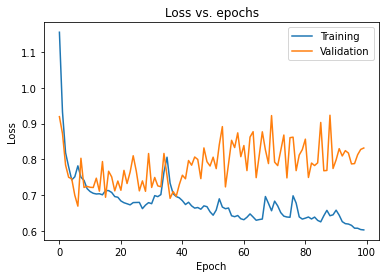

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

### Agora vamos analisar utilizando regularização no modelo

In [198]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers

In [200]:
def get_regularised_model(wd, rate):
  model = Sequential([
    Dense(128, kernel_regularizer=regularizers.l2(wd), activation='relu', input_shape=(train_data.shape[1],)),
    Dropout(rate),
    Dense(128, kernel_regularizer=regularizers.l2(wd), activation='relu'),
    Dropout(rate),
    Dense(128, kernel_regularizer=regularizers.l2(wd), activation='relu'),
    Dropout(rate),
    Dense(128, kernel_regularizer=regularizers.l2(wd), activation='relu'),
    Dropout(rate),
    Dense(128, kernel_regularizer=regularizers.l2(wd), activation='relu'),
    Dropout(rate),
    Dense(128, kernel_regularizer=regularizers.l2(wd), activation='relu'),
    Dropout(rate),
    Dense(1, activation='sigmoid')
  ])
  return model

In [201]:
model = get_regularised_model(1e-5, 0.3)

In [202]:
opt = tf.keras.optimizers.Adam()

model.compile(
              optimizer=opt,
              loss = 'mse',
              metrics = [mse]
              )

In [203]:
history = model.fit(train_data, train_targets, epochs=100, validation_split=0.15, batch_size=64, verbose=2)

Epoch 1/100
6/6 - 2s - loss: 1.2464 - mean_squared_error: 1.2398 - val_loss: 1.2503 - val_mean_squared_error: 1.2437 - 2s/epoch - 299ms/step
Epoch 2/100
6/6 - 0s - loss: 1.1898 - mean_squared_error: 1.1832 - val_loss: 1.1289 - val_mean_squared_error: 1.1224 - 54ms/epoch - 9ms/step
Epoch 3/100
6/6 - 0s - loss: 1.0549 - mean_squared_error: 1.0484 - val_loss: 0.9488 - val_mean_squared_error: 0.9423 - 54ms/epoch - 9ms/step
Epoch 4/100
6/6 - 0s - loss: 0.9789 - mean_squared_error: 0.9723 - val_loss: 0.9222 - val_mean_squared_error: 0.9157 - 55ms/epoch - 9ms/step
Epoch 5/100
6/6 - 0s - loss: 0.9605 - mean_squared_error: 0.9540 - val_loss: 0.8852 - val_mean_squared_error: 0.8787 - 57ms/epoch - 9ms/step
Epoch 6/100
6/6 - 0s - loss: 0.9009 - mean_squared_error: 0.8944 - val_loss: 0.8581 - val_mean_squared_error: 0.8517 - 46ms/epoch - 8ms/step
Epoch 7/100
6/6 - 0s - loss: 0.8632 - mean_squared_error: 0.8567 - val_loss: 0.8490 - val_mean_squared_error: 0.8426 - 44ms/epoch - 7ms/step
Epoch 8/100
6

In [35]:
model.evaluate(test_data, test_targets, verbose=2)


2/2 - 0s - loss: 0.7294 - mean_squared_error: 0.7234 - 24ms/epoch - 12ms/step


[0.7294131517410278, 0.7233731746673584]

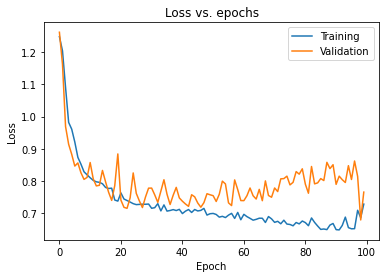

In [36]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

### Normalização por lote

In [248]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, BatchNormalization, Dropout

In [258]:
#Criando o modelo
def get_batch_model():
    model = Sequential([
    Dense(64, input_shape=[train_data.shape[1],], activation="relu"),
    BatchNormalization(),  # <- Batch normalisation layer
    Dropout(0.5),
    BatchNormalization(),  # <- Batch normalisation layer
    Dropout(0.5),
    Dense(256, activation='relu'),
 
])
    
    return model

In [259]:
model = get_batch_model()

In [260]:
model.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_129 (Dense)           (None, 64)                704       
                                                                 
 batch_normalization_103 (Ba  (None, 64)               256       
 tchNormalization)                                               
                                                                 
 dropout_92 (Dropout)        (None, 64)                0         
                                                                 
 batch_normalization_104 (Ba  (None, 64)               256       
 tchNormalization)                                               
                                                                 
 dropout_93 (Dropout)        (None, 64)                0         
                                                                 
 dense_130 (Dense)           (None, 256)             

In [261]:
#Definindo as configurações do lote
model.add(tf.keras.layers.BatchNormalization(
    momentum=0.95,
    epsilon=0.005,
    axis=-1,
    beta_initializer=tf.initializers.RandomNormal(mean=0.0, stddev=0.05),
    gamma_initializer=tf.keras.initializers.Constant(value=0.5)
))

In [262]:
model.add(Dense(1, activation='sigmoid'))

In [263]:
opt = tf.keras.optimizers.Adam()

model.compile(
    optimizer=opt,
    loss='mse',
    metrics=['mse']
)

In [264]:
history = model.fit(train_data, train_targets, epochs=100, validation_split=0.15, batch_size=64,verbose=2)

Epoch 1/100
6/6 - 2s - loss: 1.2112 - mse: 1.2112 - val_loss: 1.2927 - val_mse: 1.2927 - 2s/epoch - 260ms/step
Epoch 2/100
6/6 - 0s - loss: 1.0353 - mse: 1.0353 - val_loss: 1.2310 - val_mse: 1.2310 - 40ms/epoch - 7ms/step
Epoch 3/100
6/6 - 0s - loss: 0.9630 - mse: 0.9630 - val_loss: 1.1700 - val_mse: 1.1700 - 42ms/epoch - 7ms/step
Epoch 4/100
6/6 - 0s - loss: 0.8932 - mse: 0.8932 - val_loss: 1.1154 - val_mse: 1.1154 - 41ms/epoch - 7ms/step
Epoch 5/100
6/6 - 0s - loss: 0.8636 - mse: 0.8636 - val_loss: 1.0729 - val_mse: 1.0729 - 42ms/epoch - 7ms/step
Epoch 6/100
6/6 - 0s - loss: 0.8521 - mse: 0.8521 - val_loss: 1.0427 - val_mse: 1.0427 - 41ms/epoch - 7ms/step
Epoch 7/100
6/6 - 0s - loss: 0.7994 - mse: 0.7994 - val_loss: 1.0200 - val_mse: 1.0200 - 43ms/epoch - 7ms/step
Epoch 8/100
6/6 - 0s - loss: 0.7792 - mse: 0.7792 - val_loss: 1.0025 - val_mse: 1.0025 - 43ms/epoch - 7ms/step
Epoch 9/100
6/6 - 0s - loss: 0.8060 - mse: 0.8060 - val_loss: 0.9899 - val_mse: 0.9899 - 41ms/epoch - 7ms/step
E

In [266]:
model.evaluate(test_data, test_targets, verbose=2)

2/2 - 0s - loss: 0.7017 - mse: 0.7017 - 35ms/epoch - 18ms/step


[0.7017076015472412, 0.7017076015472412]

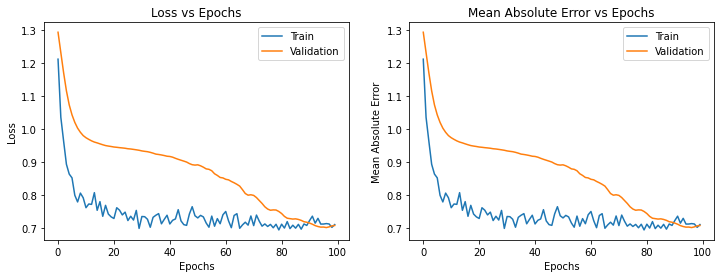

In [265]:
# Criando grafico de Perda e Precisão

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

frame = pd.DataFrame(history.history)
epochs = np.arange(len(frame))

fig = plt.figure(figsize=(12,4))

# Perda
ax = fig.add_subplot(121)
ax.plot(epochs, frame['loss'], label="Train")
ax.plot(epochs, frame['val_loss'], label="Validation")
ax.set_xlabel("Epochs")
ax.set_ylabel("Loss")
ax.set_title("Loss vs Epochs")
ax.legend()

# Precisão
ax = fig.add_subplot(122)
ax.plot(epochs, frame['mse'], label="Train")
ax.plot(epochs, frame['val_mse'], label="Validation")
ax.set_xlabel("Epochs")
ax.set_ylabel("Mean Absolute Error")
ax.set_title("Mean Absolute Error vs Epochs")
ax.legend()